<a href="https://colab.research.google.com/github/SriRamK345/Horse_Race_Predection/blob/main/Horse_Race_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

## **Data preparation**

In [2]:
location = "/content/drive/MyDrive/Horse Rece Pred"

# List all CSV files in the directory
all_files = glob.glob(os.path.join(location, '*.csv'))

# Initialize lists to hold dataframes
horses_dfs = []
races_dfs = []

# Process each file
for file in all_files:
    # Extract the base filename (without directory)
    base = os.path.basename(file).lower()

    # Split filename to check format (horses_YYYY.csv or races_YYYY.csv)
    if base.startswith('horses_') or base.startswith('races_'):
        # Determine category ('horses' or 'races')
        category = base.split('_')[0].lower()

        # Read the file into a dataframe
        df = pd.read_csv(file)

        # Extract the year from the filename and add as a column
        year = base.split('_')[1].split('.')[0]
        df['Year'] = year

        # Append the dataframe to the appropriate list based on category
        if category == 'horses':
            horses_dfs.append(df)
        elif category == 'races':
            races_dfs.append(df)

# Concatenate all dataframes in each list into a single dataframe
horses_df = pd.concat(horses_dfs, ignore_index=True)
races_df = pd.concat(races_dfs, ignore_index=True)

<ipython-input-2-779e96d0d595>:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-2-779e96d0d595>:21: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [3]:
horses_df.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,father,mother,gfather,runners,margin,weight,res_win,res_place,Year,price
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,NaN,...,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0,1990,NaN
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,10,...,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0,1990,NaN
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,15,...,Sousa,Just Camilla,Ascertain I,14,1.521003,66,0.0,1.0,1990,NaN
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,20,...,Mandalus,Indictment,Desert Call,14,1.521003,69,0.0,0.0,1990,NaN
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,dist,...,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69,0.0,0.0,1990,NaN


In [4]:
races_df.head()

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,Year,currency
0,280169,Southwell (AW),02:55,02/01/01,Littlewoods Bet Direct Daily Special Offers Se...,Class 6,NaN,4yo+,1m,Slow,NaN,"[1701.0, 486.0, 243.0]",108.3,2430.0,1609.0,GB,17,6,2002,NaN
1,320621,Southwell (AW),12:45,02/01/01,Littlewoods Bet Direct Daily Special Offers Se...,Class 6,NaN,4yo+,1m,Slow,NaN,"[1701.0, 486.0, 243.0]",109.6,2430.0,1609.0,GB,17,6,2002,NaN
2,334466,Southwell (AW),03:30,02/01/01,Call Bet Direct Free On 0800 329393 Handicap C...,Class 5,0-75,4yo+,2m½f,Slow,NaN,"[2933.0, 838.0, 419.0]",235.4,4190.0,3318.5,GB,17,5,2002,NaN
3,340719,Southwell (AW),01:45,02/01/01,Bet Direct Tax Free Betting Stakes Showcase Ha...,Class 3,0-100,3yo+,5f,Slow,NaN,"[13422.5, 4130.0, 2065.0, 1032.5]",61.6,20649.0,1005.0,GB,17,3,2002,NaN
4,354071,Southwell (AW),12:15,02/01/01,£5 Minimum Stake On 0800 329393 Apprentice Med...,Class 6,NaN,4-6yo,1m3f,Slow,NaN,"[2149.0, 614.0, 307.0]",155.3,3070.0,2212.0,GB,17,6,2002,NaN


### Now let's delete the columns that are derived from other information or are not useful for our machine learning

In [5]:
horses_df.shape, races_df.shape

((4107315, 29), (396572, 20))

In [6]:
horses_df.info(), races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107315 entries, 0 to 4107314
Data columns (total 29 columns):
 #   Column        Dtype  
---  ------        -----  
 0   rid           int64  
 1   horseName     object 
 2   age           float64
 3   saddle        float64
 4   decimalPrice  float64
 5   isFav         int64  
 6   trainerName   object 
 7   jockeyName    object 
 8   position      int64  
 9   positionL     object 
 10  dist          object 
 11  weightSt      int64  
 12  weightLb      int64  
 13  overWeight    float64
 14  outHandicap   float64
 15  headGear      object 
 16  RPR           float64
 17  TR            float64
 18  OR            float64
 19  father        object 
 20  mother        object 
 21  gfather       object 
 22  runners       int64  
 23  margin        float64
 24  weight        int64  
 25  res_win       float64
 26  res_place     float64
 27  Year          object 
 28  price         object 
dtypes: float64(11), int64(7), object(11)
memory u

(None, None)

,count
res_win,
0.0,3711478
1.0,395837


In [8]:
df.describe()

,rid,winningTime,prize,metric,ncond,class
count,17307.000000,17307.000000,1.730500e+04,17307.000000,17307.000000,17307.000000
mean,117783.641590,167.965649,4.984629e+04,2400.507829,4.002080,2.447796
std,44869.585137,102.250863,2.018761e+05,1205.412059,4.033704,2.306107
min,3.000000,0.000000,2.530000e+02,804.000000,0.000000,0.000000
25%,100007.500000,86.255000,6.947000e+03,1407.000000,1.000000,0.000000
50%,129795.000000,123.690000,1.135200e+04,2011.000000,2.000000,3.000000
75%,151547.000000,247.795000,2.869800e+04,3318.500000,7.000000,5.000000
max,172742.000000,579.900000,9.448819e+06,6938.500000,20.000000,7.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
course,17307,276,Wolverhampton (AW),593
time,17307,452,02:00,310
date,17307,365,19/05/11,99
title,17307,14363,Betway Handicap,96
rclass,10082,7,Class 4,3133
band,7212,138,0-75,607
ages,17307,24,4yo+,5445
distance,17307,60,1m,2008
condition,17306,19,Good,4862
hurdles,4663,104,10 hurdles,616


In [10]:
df.duplicated().sum()

0

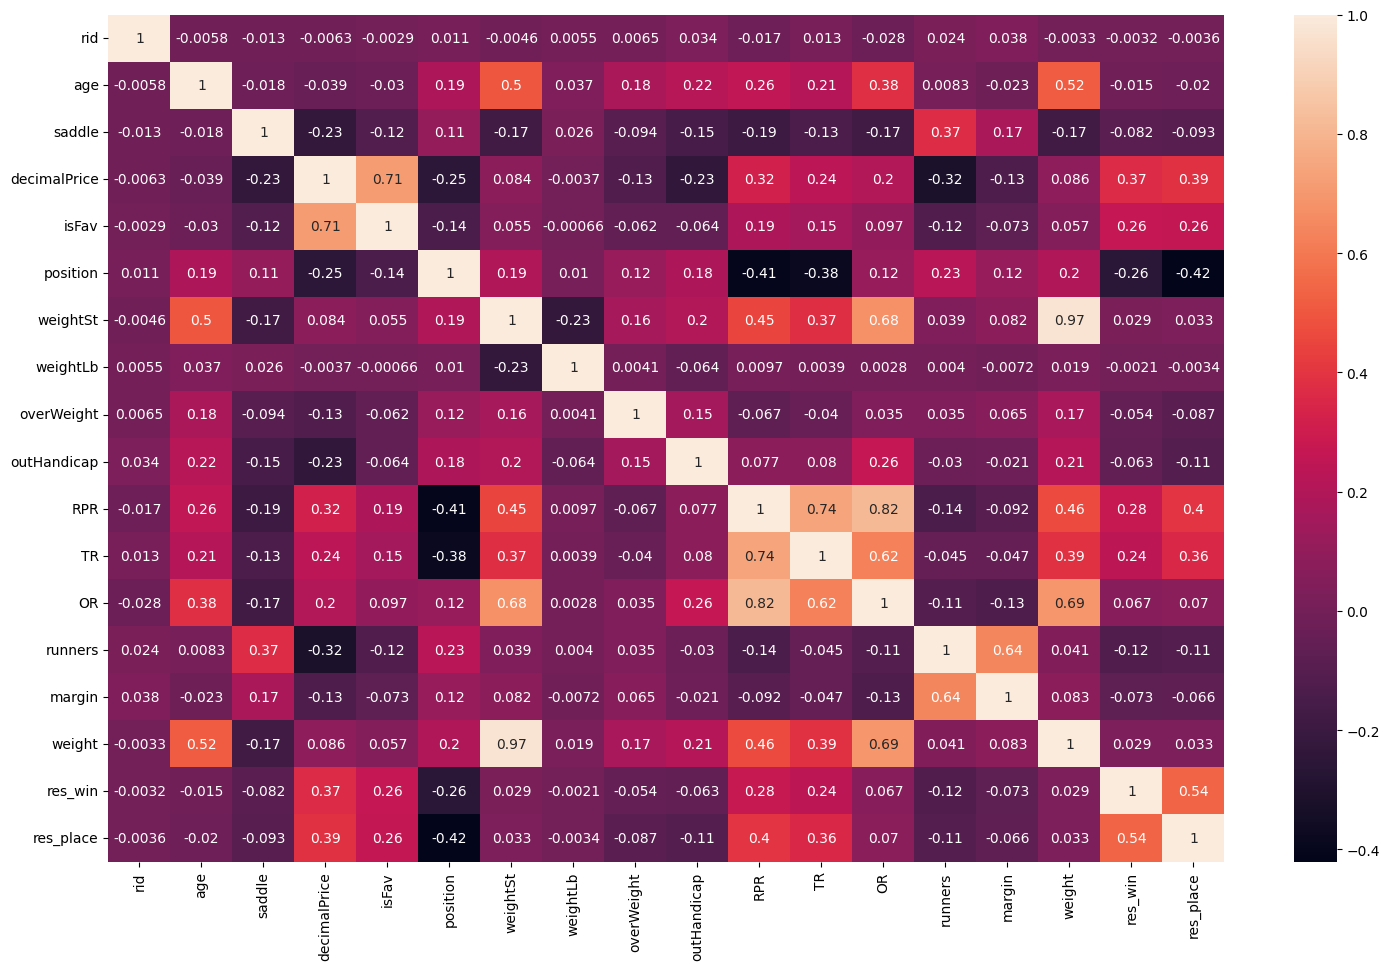

In [11]:
plt.figure(figsize=(18,11))
sns.heatmap(horses_df.select_dtypes(include=["int64","float64"]).corr(), annot=True)
plt.show()

In [15]:
unique_values = []

for i in horses_df.columns:
    x = horses_df[i].value_counts().count()
    unique_values.append(x)

pd.DataFrame(unique_values, index = horses_df.columns)

,0
rid,395186
horseName,371869
age,38
saddle,41
decimalPrice,643
isFav,2
trainerName,18448
jockeyName,17721
position,41
positionL,261


In [16]:
horses_df["res_win"].value_counts()

,count
res_win,
0.0,3711478
1.0,395837


In [17]:
horses_df["res_place"].value_counts()

,count
res_place,
0.0,2999278
1.0,1108037
